In [3]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
import random

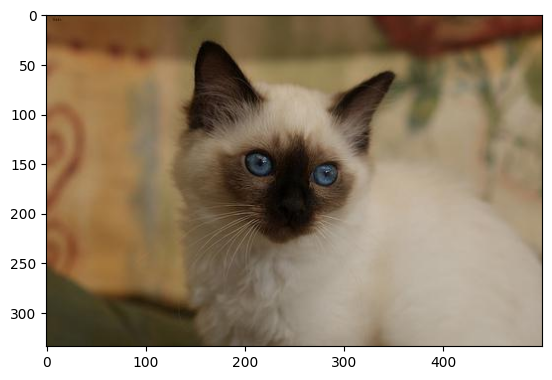

In [4]:
img =  image.load_img('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg')
plt.imshow(img)

In [5]:
cv2.imread('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg')
cv2.imread('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg').shape

(334, 500, 3)

GENERATE THE DATA SET FOR TRAINING/VALIDATION.
DEVIDE BY 255 TO MAKE OUR DATA RANGE FROM 0 TO 1

In [6]:
train =ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [7]:
train_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\catsdogextract\\train',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

validation_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\catsdogextract\\val',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [8]:
train_dataset.class_indices
validation_dataset.class_indices

{'cat': 0, 'dog': 1}

In [9]:
train_labels = train_dataset.classes
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
val_labels =validation_dataset.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [11]:
#define ur model
model = Sequential([
    Conv2D(16, (3,3), activation  = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation  = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )


C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 86s 9s/step - accuracy: 0.4659 - loss: 3.0755 - val_accuracy: 0.6714 - val_loss: 0.6294
Epoch 2/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.6689 - loss: 0.6613 - val_accuracy: 0.6571 - val_loss: 0.6805
Epoch 3/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6509 - loss: 0.6281 - val_accuracy: 0.6571 - val_loss: 0.6466
Epoch 4/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6376 - loss: 0.6026 - val_accuracy: 0.6571 - val_loss: 0.6768
Epoch 5/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6680 - loss: 0.5698 - val_accuracy: 0.6571 - val_loss: 0.6408
Epoch 6/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6902 - loss: 0.5171 - val_accuracy: 0.6714 - val_loss: 0.6359


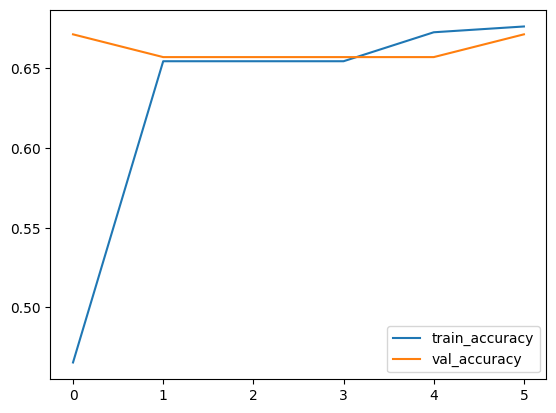

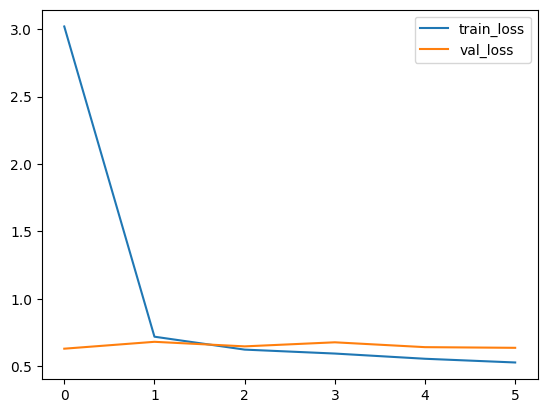

In [13]:
history= model.fit(train_dataset,  epochs= 6,validation_data=validation_dataset )

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


Continue learning

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7813 - loss: 0.4944 - val_accuracy: 0.6571 - val_loss: 0.7643
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7323 - loss: 0.4684 - val_accuracy: 0.6714 - val_loss: 0.6634
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8332 - loss: 0.4371 - val_accuracy: 0.6429 - val_loss: 0.6488


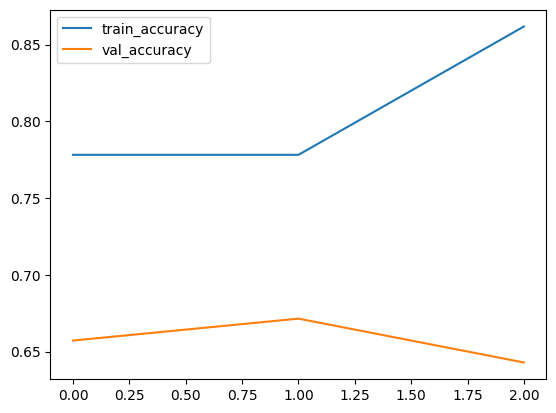

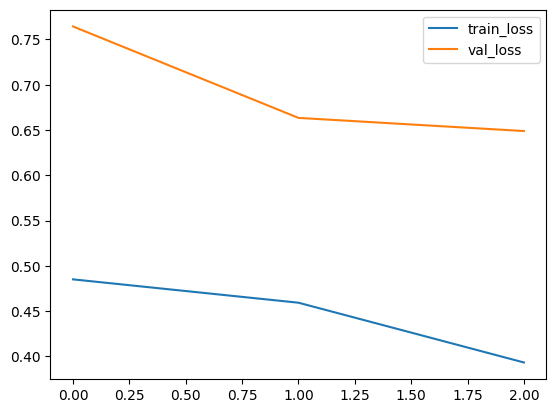

In [14]:
history = model.fit(train_dataset, epochs=3, validation_data=validation_dataset)
# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [15]:
model.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6473 - loss: 0.6493 


[0.6488412618637085, 0.6428571343421936]

Single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[0.8227092]]
It is a dog!


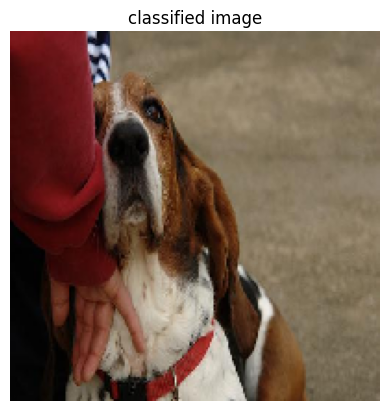

In [16]:

image_path = 'train/dog/basset_hound_156_jpg.rf.652ecf6bbe1fdc619fff8f26ef7e73b0.jpg'
img = image.load_img(image_path, target_size=(200, 200))  #resizing
img_array = image.img_to_array(img)  #numpy array conversion
img_array = np.expand_dims(img_array, axis=0)  #dimension batch
img_array /= 255.0  # Scaling the image data to be between 0 and 1

prediction = model.predict(img_array)
print(prediction)

if prediction < 0.5:
    print('It is a cat!')
else:
    print('It is a dog!')


plt.imshow(img) 
plt.axis('off') 
plt.title("classified image") 
plt.show() 

Multiple images using Random function

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
[[0.37331012]]


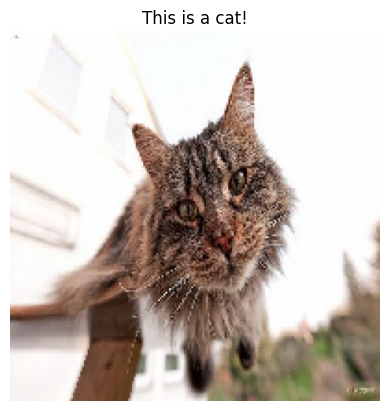

In [23]:
import pyttsx3
test_dir = r'C:\Users\John\PycharmProjects\ML\catsdogextract\test'
images = os.listdir(test_dir)
random_image = random.choice(images)
image_path = os.path.join(test_dir, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)

if prediction < 0.5:
    result ='This is a cat!'
else:
    result = 'This is a dog!'
    
engine = pyttsx3.init()
engine.say(result)
engine.runAndWait()
engine.stop()


plt.imshow(img)
plt.axis('off')
plt.title(result)
plt.show()
